In [1]:
import glob
import chess
import pickle
from tqdm import tqdm
import numpy as np

In [ ]:
#Get the Elo ratings of players played in the games used for the model and its evaluation
game_files = glob.glob('games/*')

elos = []

for game_file in game_files:
    print(f'Loading {game_file}...')
    with open( game_file, "rb" ) as f:
            try:
                games = pickle.load(f)
            except:
                continue
            for game in tqdm(games):
                try:
                    if "WhiteFideId" not in game.headers or "BlackFideId" not in game.headers: #Skip games not used in the model, games without Fide ids were ignored
                        continue

                    if 'BlackElo' in game.headers:
                        elos.append(int(game.headers['BlackElo']))
                        
                    if 'WhiteElo' in game.headers:
                        elos.append(int(game.headers['WhiteElo']))
                except:
                    pass

Loading games/games-1.pkl...


  0%|          | 0/100000 [00:00<?, ?it/s]


Headers(Event='FIDE Candidates 2018', Site='Berlin GER', Date='2018.03.20', Round='9.1', White='So,W', Black='Grischuk,A', Result='1/2-1/2', BlackElo='2767', BlackFideId='4126025', BlackTitle='GM', ECO='C67', EventDate='2018.03.10', Opening='Ruy Lopez', Variation='Berlin defence, open variation', WhiteElo='2799', WhiteFideId='5202213', WhiteTitle='GM')
Loading games/games-2.pkl...
Loading games/games-3.pkl...


  0%|          | 0/100000 [00:00<?, ?it/s]


Headers(Event='New York Winter IMC 2023', Site='New York USA', Date='2023.01.14', Round='4.1', White='Nakada,Akira', Black='Hardaway,Brewington', Result='0-1', BlackElo='2345', BlackFideId='30941849', BlackTitle='CM', ECO='A13', EventDate='2023.01.12', Opening='English opening', WhiteElo='2304', WhiteFideId='30903920', WhiteTitle='FM')
Loading games/games-4.pkl...


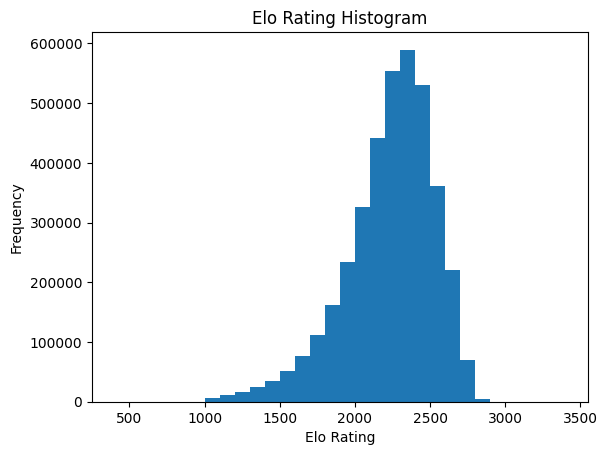

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#Draw distribution of the Elo ratings, each 100 points is a bin of its own
data = [e for e in elos if e > 0]
bin_size = 100
min_value = min(data)
max_value = max(data)
num_bins = int(np.ceil((max_value - min_value + 1) / bin_size))
bin_boundaries = [min_value + i * bin_size for i in range(num_bins + 1)]

plt.hist(data, bins=bin_boundaries)

# Add labels and title
plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.title('Elo Rating Histogram')

# Display the histogram
plt.show()

In [4]:
import numpy as np
#Count number of samples used and how many are female
files = glob.glob('/sise/liorrk-group/DataSets/Datamining/xs_data/ys*')
total = 0
women = 0
for file in files:
    ys = np.load(file) # target values of the model, 1 is for women, 0 is for men
    total += len(ys)
    women += sum(ys)

print(f'There is a total of {total} samples')
print(f'There are {women} samples of women')

There is a total of 3827624 samples
There are 588551 samples of women


In [15]:
def replace_last(string, word_to_replace, replacement):
    split_string = string.rsplit(word_to_replace, 1)
    return replacement.join(split_string)

#Like when training the model, first file for the test set
files = glob.glob('/sise/liorrk-group/DataSets/Datamining/xs_data/xs*')
files = list(map(lambda file: replace_last(file, 'xs', 'ys'), files))

test_file = files[0]
train_files = files[1:]

def count_samples(files):
    women = 0
    total = 0
    for file in files:
        ys = np.load(file)
        women += sum(ys) #women represented as 1 in the data, 0 for men
        total += len(ys)
    return total, women

test_total, test_women = count_samples([test_file])
print(f'There is a total of {test_total} samples in the test set, out of them {test_women} women')
train_total, train_women = count_samples(train_files)
print(f'There is a total of {train_total} samples in the test set, out of them {train_women} women')

There is a total of 195572 samples in the test set, out of them 22679 women
There is a total of 3632052 samples in the test set, out of them 565872 women


In [20]:
print(f'The ratio of women in the test set is: {test_women / test_total}')

The ratio of women in the test set is: 0.11596240770662467


In [22]:
print(f'The ratio of women in the train set is: {train_women / train_total}')

The ratio of women in the train set is: 0.1557995315045049


In [3]:
#Count the number of moves each game in the data set has
move_counts = []
game_files = glob.glob('games/*')
for game_file in game_files:
    print(f'Loading {game_file}...')
    with open( game_file, "rb" ) as f:
            try:
                games = pickle.load(f)
            except:
                continue
            for game in tqdm(games):
                try:
                    if "WhiteFideId" not in game.headers or "BlackFideId" not in game.headers: #Skip games not used in the model
                        continue

                    if 'BlackElo' not in game.headers:
                        pass
                        
                    if 'WhiteElo' not in game.headers:
                        pass
                    
                    #Count the moves
                    count = 0
                    for move in game.mainline_moves():
                        count += 1
                    move_counts.append(count / 2)
                except:                    
                    pass            
print(f'There are {sum(move_counts) / len(move_counts)} moves per game on average')

Loading games/games-1.pkl...


100%|██████████| 100000/100000 [00:05<00:00, 17374.17it/s]

Loading games/games-2.pkl...
Loading games/games-3.pkl...
Loading games/games-4.pkl...
Loading games/games-5.pkl...
Loading games/games-6.pkl...
Loading games/games-7.pkl...
Loading games/games-8.pkl...
Loading games/games-9.pkl...
Loading games/games-10.pkl...
Loading games/games-11.pkl...
Loading games/games-12.pkl...
Loading games/games-13.pkl...
Loading games/games-14.pkl...
Loading games/games-15.pkl...
Loading games/games-16.pkl...
Loading games/games-17.pkl...
Loading games/games-18.pkl...
Loading games/games-19.pkl...
Loading games/games-20.pkl...
Loading games/games-21.pkl...
Loading games/games-22.pkl...
There are 42.26089 moves per game on average
